<a href="https://colab.research.google.com/github/Armanskij/EBAC_Studies/blob/main/Profissao_Analista_de_dados_M27_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização Interativa de Dados
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)
<br>
Elaborado por [Douglas Rizzi](https://www.linkedin.com/in/douglas-rizzi/)

---

# **Tópicos**

<ol type="1">
  <li>Google Data Studio;</li>
  <li>Dados;</li>
  <li>Relatório.</li>
</ol>

---

# **Exercícios**

## 1\. Contexto

Você é o analista de dados de um grande aeroporto. O time de operações precisa acompanhar o fluxo mensal de passageiros para tomar decisões sobre manutenção, obras, etc. Você propõe a construção de um *dashboard* de dados para auxiliar o time na tomada de decisão.

## 2\. Preparação

Carregue as bibliotecas Python de manipulação de dados.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### **2.1. Extração**

Carregue os dados de **voos** (*flights*) e responda as perguntas abaixo:

In [2]:
flights = sns.load_dataset('flights')

In [3]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


Responda:

 - Qual é a granularidade temporal da base de dados: **?**
 - Qual é o intervalo de tempo (min/max): **?**

In [5]:
# criando um coluna para calcular a granularidade
flights['ano-mes'] = flights['year'].astype(str) + '-' + flights['month'].astype(str).str.zfill(2)
flights['ano-mes'] = pd.to_datetime(flights['ano-mes'], format='%Y-%b')
gran_voo = flights.set_index(keys=['ano-mes'])
granularidade = pd.infer_freq(gran_voo.index)
print(f'A granularidade desse dataset é {granularidade}')

A granularidade desse dataset é MS


In [6]:
intervalo = (flights['ano-mes'].max()-flights['ano-mes'].min())
print(f'O intervalo total de tempo é de {flights.index.max()} meses, sendo um total de {intervalo.days} dias ')

O intervalo total de tempo é de 143 meses, sendo um total de 4352 dias 


### **2.2. Transformação**

Tranforme o texto da coluna `month` para sua representação numérica, exemplo: `Jan` para `1` e `Dec` para `12`.

In [7]:
# criando um df com um dict dos meses para recolocar
df_mes = pd.DataFrame({'mes':
 ['Jan','Fev','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']})
flights['month'] = flights['month'].replace(
    {'Jan': '01','Feb': '02','Mar': '03','Apr': '04',
     'May': '05','Jun': '06','Jul': '07','Aug': '08',
     'Sep': '09','Oct': '10', 'Nov': '11', 'Dec': '12'})

In [8]:
flights.head(12)

,year,month,passengers,ano-mes
0,1949,01,112,1949-01-01
1,1949,02,118,1949-02-01
2,1949,03,132,1949-03-01
3,1949,04,129,1949-04-01
4,1949,05,121,1949-05-01
5,1949,06,135,1949-06-01
6,1949,07,148,1949-07-01
7,1949,08,148,1949-08-01
8,1949,09,136,1949-09-01
9,1949,10,119,1949-10-01


Crie uma chave temporal `year-month` no formato `YYYY-MM` através da concatenação das colunas `year` e `month`, exemplo: `1949-01`.

In [9]:
flights['year-month'] = flights['year'].astype(str) + '-' + (flights['month'].astype(str)).apply(lambda x:'{:02}'.format(x))
flights.drop('ano-mes',axis=1, inplace=True)

In [10]:
flights

,year,month,passengers,year-month
0,1949,01,112,1949-01
1,1949,02,118,1949-02
2,1949,03,132,1949-03
3,1949,04,129,1949-04
4,1949,05,121,1949-05
...,...,...,...,...
139,1960,08,606,1960-08
140,1960,09,508,1960-09
141,1960,10,461,1960-10
142,1960,11,390,1960-11


Reordene as colunas da seguinte forma: `year-month`, `year`, `month` e `passengers`.

In [11]:
flights = flights[['year-month', 'year', 'month', 'passengers']]

In [12]:
flights

,year-month,year,month,passengers
0,1949-01,1949,01,112
1,1949-02,1949,02,118
2,1949-03,1949,03,132
3,1949-04,1949,04,129
4,1949-05,1949,05,121
...,...,...,...,...
139,1960-08,1960,08,606
140,1960-09,1960,09,508
141,1960-10,1960,10,461
142,1960-11,1960,11,390


### **2.3. Carregamento**

Persista o DataFrame em um arquivo com o nome `flights.csv`, no formato CSV. Garanta que o índice será descartado.

In [13]:
flights.to_csv('flights.csv', index=False)

## 3\. Dashboard

Conduza os items **3.1** e **3.2** no [Google Data Studio](https://datastudio.google.com/).

### **3.1. Fonte de dados**

Crie a fonte de dados `flights-data` através do *upload* do arquivo `flights.csv`.

### **3.2. Relatório**

Crie o relatório `flights-report` utilizando a fonte de dados `flights-data`. Edite o relatório conforme sua criatividade (texto, cores, etc.). Compartilhe o relatório e copie o link abaixo:

 - KPI

Crie um filtro a nível de página com a dimensão `year`. Adicione um `scorecard` com uma `métrica` que represente a `soma dos passageiros em um determinado ano`. Note que o valor do `scorecard` deve ser dinâmico, ou seja, deve se alterar com o filtro temporal `year`.

 - EDA

Adicione um gráfico de série temporal (*time series chart*) utilizando com dimensão a coluna `year-month` e como métrica a soma da dimensão `passengers`. Note que o valor do gráfico deve ser dinâmico, ou seja, deve se alterar com o filtro temporal `year`.

 - Link

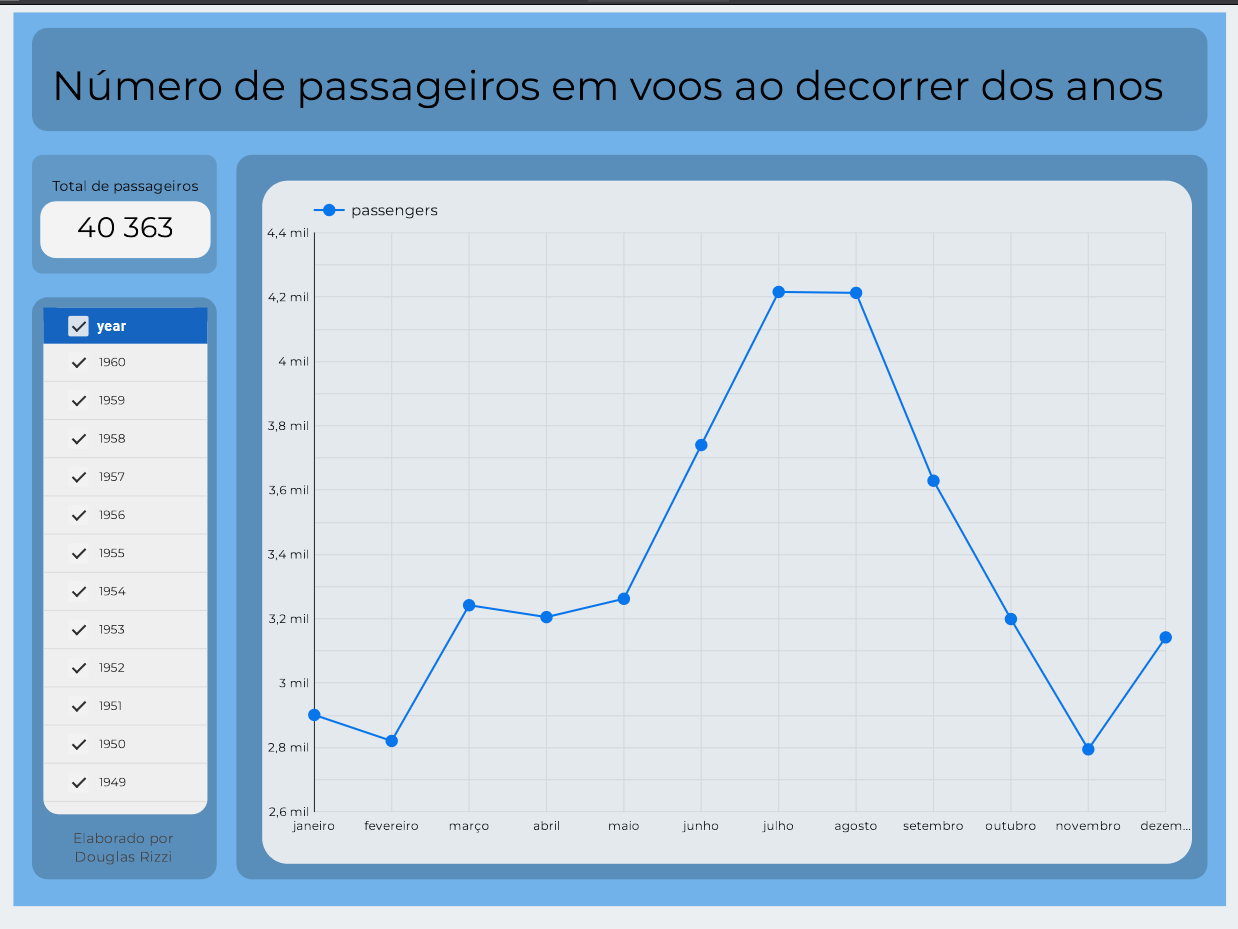

 > Link do relatório: **https://lookerstudio.google.com/s/grpcrUheHdg**

---